In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10,3)

In [3]:
 df = pd.read_parquet(
     "file:///home/bestieboots/repos/chess-research/bronze/volume/lichess_db_standard_rated_2025-07_moves",
 )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32546181 entries, 0 to 32546180
Data columns (total 14 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   move_ply                  int32   
 1   game_url                  object  
 2   game_tc_base              int32   
 3   game_tc_inc               int32   
 4   player_elo                int32   
 5   move_clock_start          int32   
 6   move_clock_end            int32   
 7   move_clock_diff           int32   
 8   game_utc_date             object  
 9   game_utc_time             object  
 10  move_from_fen             object  
 11  move_from_fragility       float32 
 12  move_from_fragility_diff  float32 
 13  game_tc                   category
dtypes: category(1), float32(2), int32(7), object(4)
memory usage: 2.1+ GB


In [5]:
data = df[
    (df["game_tc"] == "1800+0") &
    (df["player_elo"] > 2000) &
    (df["move_ply"] <= 100)
]

frag_by_ply = data.groupby("move_ply").agg(
    fragility_mean=("move_from_fragility", "mean"), 
    fragility_min=("move_from_fragility", "min"),
    fragility_max=("move_from_fragility", "max"),
    fragility_std=("move_from_fragility", "std"),
)

time_by_ply = data.groupby("move_ply").agg(
    time_spent_mean=("move_clock_diff", "mean"), 
    time_spent_min=("move_clock_diff", "min"),
    time_spent_max=("move_clock_diff", "max"),
    time_spent_std=("move_clock_diff", "std"),
)

frag_diff_by_ply = data.groupby("move_ply").agg(
    fragility_diff_mean=("move_from_fragility_diff", "mean"), 
    fragility_diff_min=("move_from_fragility_diff", "min"),
    fragility_diff_max=("move_from_fragility_diff", "max"),
    fragility_diff_std=("move_from_fragility_diff", "std"),
)

data.shape

(773504, 14)

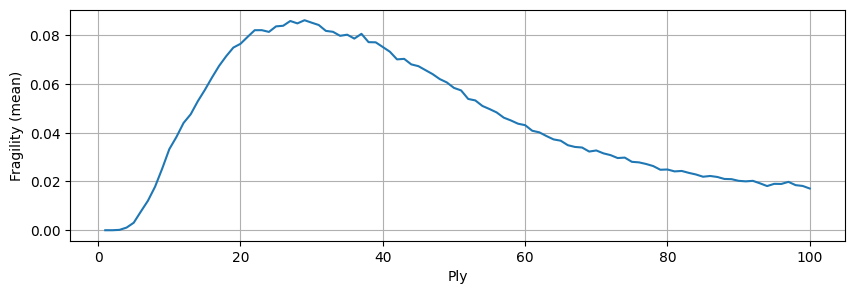

In [6]:
plt.plot(frag_by_ply.index, frag_by_ply["fragility_mean"])
plt.xlabel("Ply")
plt.ylabel("Fragility (mean)")
plt.grid()
plt.show()

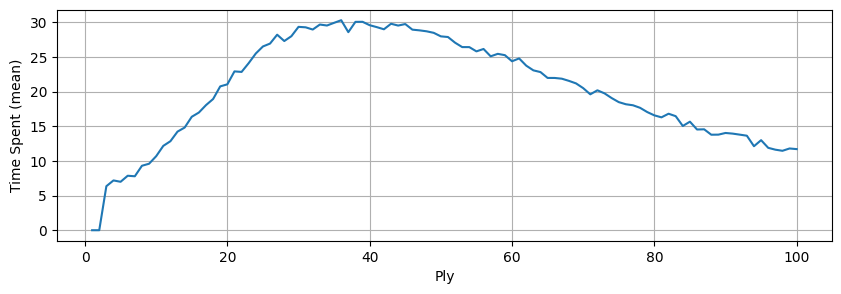

In [7]:
plt.plot(time_by_ply.index, time_by_ply["time_spent_mean"])
plt.xlabel("Ply")
plt.ylabel("Time Spent (mean)")
plt.grid()
plt.show()

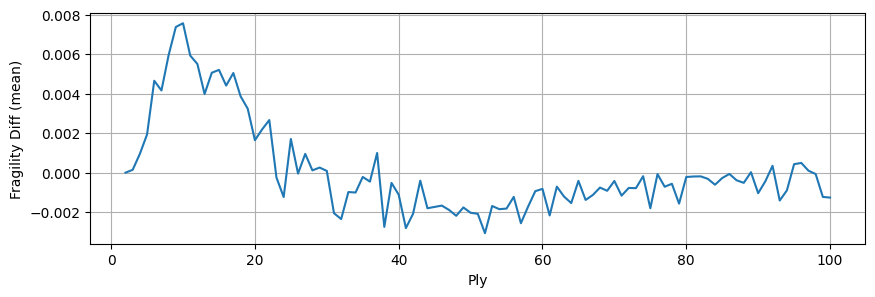

In [8]:
plt.plot(frag_diff_by_ply.index, frag_diff_by_ply["fragility_diff_mean"])
plt.xlabel("Ply")
plt.ylabel("Fragility Diff (mean)")
plt.grid()
plt.show()

In [9]:
data[["move_ply", "move_from_fragility", "move_ply", "move_from_fragility_diff", "move_clock_diff"]].corr()

,move_ply,move_from_fragility,move_ply,move_from_fragility_diff,move_clock_diff
move_ply,1.000000,-0.056203,1.000000,-0.028968,0.056080
move_from_fragility,-0.056203,1.000000,-0.056203,0.387444,0.109447
move_ply,1.000000,-0.056203,1.000000,-0.028968,0.056080
move_from_fragility_diff,-0.028968,0.387444,-0.028968,1.000000,0.030482
move_clock_diff,0.056080,0.109447,0.056080,0.030482,1.000000


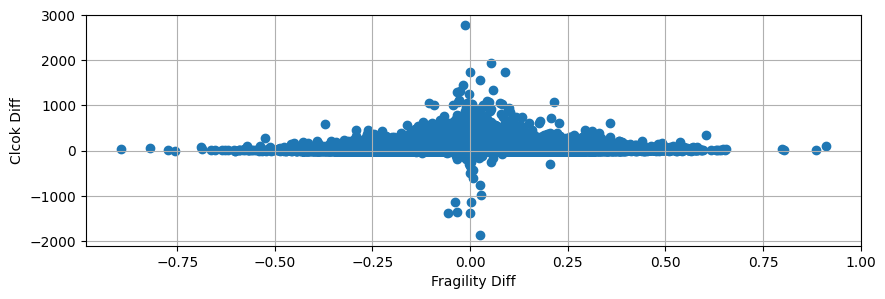

In [10]:
plt.scatter(data["move_from_fragility_diff"], data["move_clock_diff"])
plt.xlabel("Fragility Diff")
plt.ylabel("Clcok Diff")
plt.grid()
plt.show()

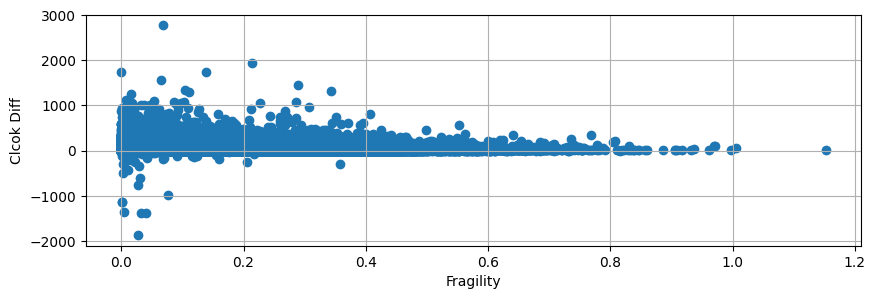

In [14]:
plt.scatter(data["move_from_fragility"], data["move_clock_diff"])
plt.xlabel("Fragility")
plt.ylabel("Clcok Diff")
plt.grid()
plt.show()

In [11]:
data[["move_from_fragility", "move_from_fragility_diff", "move_clock_diff", "move_clock_end"]].describe()

,move_from_fragility,move_from_fragility_diff,move_clock_diff,move_clock_end
count,773504.000000,762300.000000,773504.000000,773504.000000
mean,0.050870,0.000506,20.899676,1401.756879
std,0.072303,0.055951,36.875517,423.650001
min,0.000000,-0.893306,-1875.000000,0.000000
25%,0.006748,-0.007741,3.000000,1201.000000
50%,0.022475,0.000000,9.000000,1551.000000
75%,0.065537,0.008450,23.000000,1737.000000
max,1.152567,0.910894,2778.000000,3677.000000


In [12]:
clock_and_frag = pd.DataFrame({
    "long_think": data["move_clock_diff"] > 23, 
    "big_frag": data["move_from_fragility"] > 0.065537
})
clock_and_frag.value_counts()

long_think  big_frag
False       False       450522
            True        131480
True        False       129646
            True         61856
Name: count, dtype: int64

In [13]:
clock_and_frag[["long_think", "big_frag"]].corr()

,long_think,big_frag
long_think,1.000000,0.096786
big_frag,0.096786,1.000000
